In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# check and corrections

In [124]:
df = pd.read_csv("last_check.csv")

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94929 entries, 0 to 94928
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   94929 non-null  object 
 1   bathroom              94929 non-null  float64
 2   bedroom               94929 non-null  int64  
 3   construction_year     94929 non-null  int64  
 4   district              94929 non-null  object 
 5   fireplace             94929 non-null  bool   
 6   flooding_zone         94929 non-null  int64  
 7   furnished             94929 non-null  bool   
 8   garden                94929 non-null  bool   
 9   garden_area           94929 non-null  int64  
 10  kitchen               94929 non-null  float64
 11  living_area           94929 non-null  float64
 12  locality              94929 non-null  object 
 13  postal_code           94929 non-null  int64  
 14  price                 94929 non-null  int64  
 15  property_id        

**still float!!! living area , bathroom, kitchen, room_count, surface_of_plot**


In [33]:
# Bathroom rounding with conditions
def custom_round(x):
    fractional_part = x - int(x)
    if 0 <= fractional_part <= 0.5:
        return np.floor(x)
    else:
        return np.ceil(x)

# `bathroom` sütununu özel yuvarlama fonksiyonuyla güncelle
df['surface_of_plot'] = df['surface_of_plot'].apply(custom_round).astype(int)

In [34]:
del df['property_id']

*******

********

**should prsqm related with the district **

In [35]:
#formal pricesqm 

pricesqm = {'Tournai': 1799, 'Brugge': 3670, 'Veurne': 3349, 'Mechelen': 2620, 'Antwerp': 2614, 'Ieper': 2188, 'Mons': 1536, 
            'Philippeville': 1549, 'Brussels': 3305, 'Soignies': 1812, 'Charleroi': 1507, 'Leuven': 2906, 'Liège': 1969, 
            'Aalst': 2151, 'Sint-Niklaas': 2342, 'Verviers': 1917, 'Marche-en-Famenne': 1816, 'Kortrijk': 2204, 'Gent': 2909, 
            'Eeklo': 2197, 'Hasselt': 2197, 'Nivelles': 2716, 'Diksmuide': 2100, 'Dendermonde': 2267, 'Huy': 1842, 
            'Tongeren': 2142, 'Dinant': 1835, 'Neufchâteau': 1725, 'Halle-Vilvoorde': 2735, 'Tielt': 2188, 'Roeselare': 2063, 
            'Namur': 2136, 'Oostend': 2661, 'Oudenaarde': 2099, 'Thuin': 1540, 'Arlon': 2375, 'Turnhout': 2200, 'Ath': 1834, 
            'Maaseik': 2163, 'Virton': 1917, 'Bastogne': 1814, 'Mouscron': 1799, 'Waremme': 1905}

pricesqm_series = pd.Series(pricesqm)

df['price_sqm'] = df['district'].map(pricesqm_series)

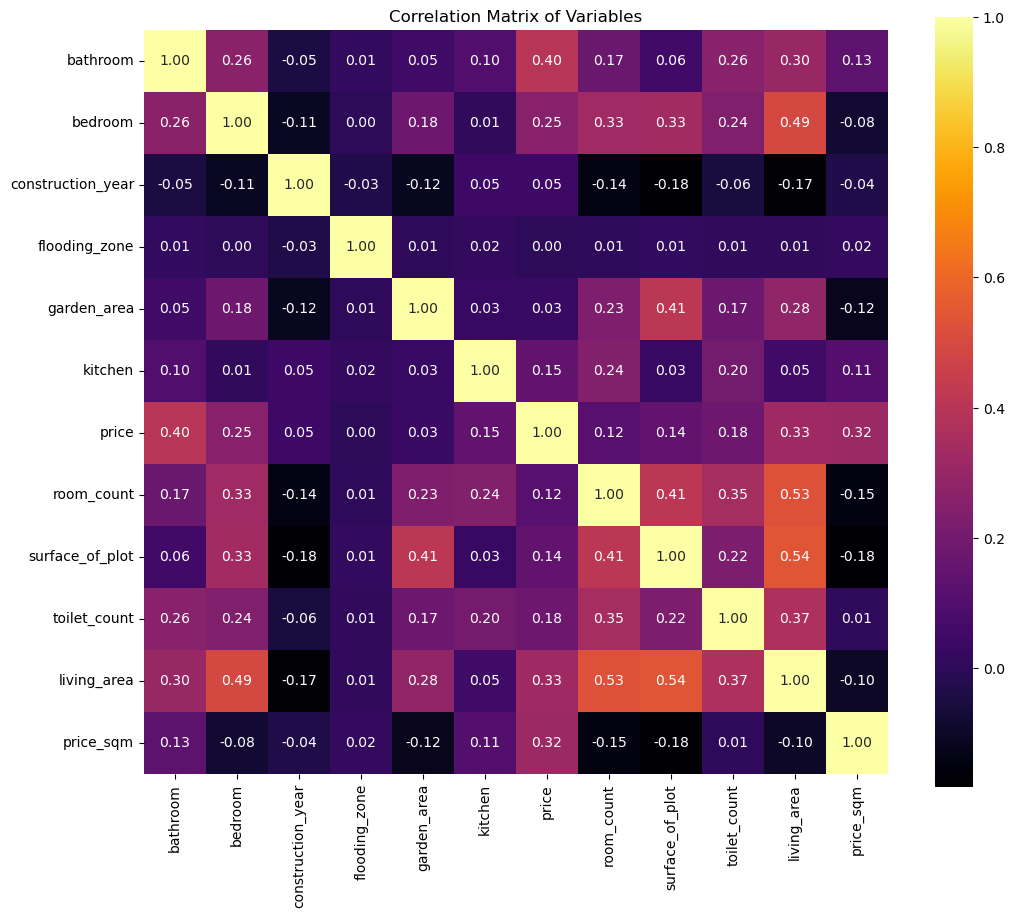

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesaplama
correlation_matrix = df[['bathroom', 'bedroom', 'construction_year', 'flooding_zone',
                          'garden_area', 'kitchen', 'price', 'room_count', 
                          'surface_of_plot', 'toilet_count', 'living_area', 'price_sqm']].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='inferno', cbar=True, square=True)
plt.title('Correlation Matrix of Variables')
plt.show()

In [38]:
df.head()

,Url,bathroom,bedroom,construction_year,district,fireplace,flooding_zone,furnished,garden,garden_area,...,room_count,subtype_of_property,surface_of_plot,swimming_pool,terrace,toilet_count,type_of_property,PEB_grade,Building_state_grade,price_sqm
0,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969,Brugge,False,0,False,False,0,...,1.000000,flat_studio,0,False,True,1,2,5,4,3670
1,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008,Brugge,False,0,True,False,0,...,7.074217,house,0,False,False,2,1,6,4,3670
2,https://www.immoweb.be/en/classified/house/for...,1.0,4,1991,Veurne,False,0,False,True,54,...,5.953892,house,170,False,True,2,1,2,3,3349
3,https://www.immoweb.be/en/classified/apartment...,1.0,2,1972,Hasselt,False,0,False,False,0,...,1.000000,apartment,0,False,True,1,2,6,6,2197
4,https://www.immoweb.be/en/classified/apartment...,1.0,1,1994,Brussels,False,0,True,False,0,...,5.000000,apartment,0,False,True,1,2,3,6,3305


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96057 entries, 0 to 96056
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   96057 non-null  object 
 1   bathroom              96057 non-null  float64
 2   bedroom               96057 non-null  int64  
 3   construction_year     96057 non-null  int64  
 4   district              96057 non-null  object 
 5   fireplace             96057 non-null  bool   
 6   flooding_zone         96057 non-null  int64  
 7   furnished             96057 non-null  bool   
 8   garden                96057 non-null  bool   
 9   garden_area           96057 non-null  int64  
 10  kitchen               96057 non-null  float64
 11  living_area           96057 non-null  float64
 12  locality              96057 non-null  object 
 13  postal_code           96057 non-null  int64  
 14  price                 96057 non-null  int64  
 15  province           

**Commune merge**

In [40]:
df_mun = pd.read_csv("mun_df.csv")

In [41]:
df_mun['postal_code'] = df_mun['Postal_code']

In [42]:
df = pd.merge(df, df_mun, on= 'postal_code', how='left')

In [44]:
del df['Postal_code']

In [ ]:
df.head(30)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96057 entries, 0 to 96056
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   96057 non-null  object 
 1   bathroom              96057 non-null  float64
 2   bedroom               96057 non-null  int64  
 3   construction_year     96057 non-null  int64  
 4   district              96057 non-null  object 
 5   fireplace             96057 non-null  bool   
 6   flooding_zone         96057 non-null  int64  
 7   furnished             96057 non-null  bool   
 8   garden                96057 non-null  bool   
 9   garden_area           96057 non-null  int64  
 10  kitchen               96057 non-null  float64
 11  living_area           96057 non-null  float64
 12  locality              96057 non-null  object 
 13  postal_code           96057 non-null  int64  
 14  price                 96057 non-null  int64  
 15  province           

##CHECK AND UPDATE##

In [48]:
df.to_csv("last_check2.csv", index=False)

********

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96057 entries, 0 to 96056
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathroom              96057 non-null  int64  
 1   bedroom               96057 non-null  int64  
 2   construction_year     96057 non-null  int64  
 3   district              96057 non-null  object 
 4   fireplace             96057 non-null  bool   
 5   flooding_zone         96057 non-null  int8   
 6   furnished             96057 non-null  bool   
 7   garden                96057 non-null  bool   
 8   garden_area           96057 non-null  int64  
 9   kitchen               96057 non-null  int64  
 10  living_area           96057 non-null  float64
 11  locality              96057 non-null  object 
 12  postal_code           96057 non-null  int64  
 13  price                 96057 non-null  int64  
 14  province              96057 non-null  object 
 15  region             

In [134]:
df2 = pd.read_csv("last_check2.csv")

In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96057 entries, 0 to 96056
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Url                   96057 non-null  object 
 1   bathroom              96057 non-null  float64
 2   bedroom               96057 non-null  int64  
 3   construction_year     96057 non-null  int64  
 4   district              96057 non-null  object 
 5   fireplace             96057 non-null  bool   
 6   flooding_zone         96057 non-null  int64  
 7   furnished             96057 non-null  bool   
 8   garden                96057 non-null  bool   
 9   garden_area           96057 non-null  int64  
 10  kitchen               96057 non-null  float64
 11  living_area           96057 non-null  float64
 12  locality              96057 non-null  object 
 13  postal_code           96057 non-null  int64  
 14  price                 96057 non-null  int64  
 15  province           

In [141]:
# Bathroom and room_count, kitchen living_area rounding with conditions
def custom_round(x):
    fractional_part = x - int(x)
    if 0 <= fractional_part <= 0.5:
        return np.floor(x)
    else:
        return np.ceil(x)

# `bathroom` sütununu özel yuvarlama fonksiyonuyla güncelle
df2['living_area'] = df2['living_area'].apply(custom_round).astype(int)

In [139]:
del df2['Url']

In [ ]:
df2.to_csv("befor_Final_data.csv", index=False)

*********

## Categories

In [205]:
df3 = pd.read_csv("befor_Final_data.csv")

In [206]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96057 entries, 0 to 96056
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bathroom              96057 non-null  int64 
 1   bedroom               96057 non-null  int64 
 2   construction_year     96057 non-null  int64 
 3   district              96057 non-null  object
 4   fireplace             96057 non-null  bool  
 5   flooding_zone         96057 non-null  int64 
 6   furnished             96057 non-null  bool  
 7   garden                96057 non-null  bool  
 8   garden_area           96057 non-null  int64 
 9   kitchen               96057 non-null  int64 
 10  living_area           96057 non-null  int64 
 11  locality              96057 non-null  object
 12  postal_code           96057 non-null  int64 
 13  price                 96057 non-null  int64 
 14  province              96057 non-null  object
 15  region                96057 non-null

In [207]:
df3['flooding_zone'] = df3['flooding_zone'].astype(bool)

In [208]:
df3['subtype_of_property'] = df3['subtype_of_property'].astype('category')

In [209]:
df3['subtype_of_property'] = df3['subtype_of_property'].cat.codes

In [210]:
df3['region_province_district_commune'] = df3['region'] + "_" +['province']+ "_" + df3['district'] + "_" + df3['Nom_commune']
df3 = pd.get_dummies(df3, columns=['region_province_district_commune'])


In [211]:
del df3['locality']
del df3['district']
del df3['province']
del df3['region']

In [212]:
del df3['Nom_commune']

***********

# Last CHECK

In [213]:
df3.to_csv("Final_data.csv", index=False)